In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import json
import clustering
from clustering.what_if_model import WhatIfModel
from clustering.pqp_input_parser import PQPInputParser
from clustering.util import create_model
import autoreload
import clustering.evaluation

%load_ext autoreload
%autoreload 2
pd.set_option('display.max_colwidth', -1)

In [2]:
BASE_PATH_TPCH = "~/Dokumente/repos/example_plugin/stats/final/tpch/sf1-2d/"
TPCH_ORDERKEY = f"{BASE_PATH_TPCH}/l_orderkey"
TPCH_SHIPDATE = f"{BASE_PATH_TPCH}/l_shipdate"

In [3]:
m = create_model("lineitem", PQPInputParser("tpch", TPCH_ORDERKEY), 2)

cost_model_output/models/


# JOIN EVALUATION

In [40]:
CLUSTERING_COLUMN = "l_shipdate"
SIDED = True
join_results = clustering.evaluation.evaluate_join_step(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100], "ALL", SIDED)


print(f"There are {len(join_results)} joins")
join_results['e'] = join_results['TOTAL_ERROR'] ** 2
join_results.sort_values(['e'], ascending=False)[["QUERY_HASH1", "DESCRIPTION1", "RUNTIME_BASE_MS", "RUNTIME_ESTIMATE_MS", "RUNTIME_CLUSTERED_MS", "RELATIVE_ERROR", "TOTAL_ERROR_MS"]]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column INPUT_COLUMN_SORTED_Ascending
adding column SELECTIVITY_LEFT

There are 20 joins with estimated negative run time. This is bad.
           QUERY_HASH  \
1    af04794535660bfb   
6    550d82dfc9e49105   
20   ca18c361736e9938   
24   bc9c5b09f7327ee    
27   581025346a1e14fe   
37   32c23f6f991a064d   
48   efe8810009ceeca4   
63   65e8223a5ee91fb8   
77   7c90cd3a1b165fad   
100  e16ba5ded0a91c94   
103  3c13b8ba3d206f05   
143  cede475d1331e7a4   
211  8dc3fd52eb6d3c3d   
310  f6311ed25cf11ce6   
318  ab8e3343baeab48e   
338  58d150518c8f1926   
375  6cb6d54beeff1622   
519  73b23b8a1b9c71cd   
569  e7bb22c68d9903fa   
589  f048d2943c79146a   

                                                         DESCRIPTION  \
1    JoinHash (Inner Join where l_partkey = p_partkey) Radix bits: 0   
6   

383 joins with lineitem as probe or build side
There are 383 joins


,QUERY_HASH1,DESCRIPTION1,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,RELATIVE_ERROR,TOTAL_ERROR_MS
266,bfb403aee0d212a,JoinHash (Semi Join where l_orderkey = l_orderkey) Radix bits: 1,159,183,259,1.415536,76
164,7324393c05ab5301,JoinHash (Semi Join where l_orderkey = l_orderkey) Radix bits: 1,143,174,239,1.377550,65
132,6730c267d3eac48a,JoinHash (Semi Join where l_orderkey = l_orderkey) Radix bits: 1,143,176,241,1.369759,65
147,6ec3126b032024be,JoinHash (Semi Join where l_orderkey = l_orderkey) Radix bits: 1,145,182,246,1.346259,63
220,a17cb368eadced8f,JoinHash (Semi Join where l_orderkey = l_orderkey) Radix bits: 1,139,174,237,1.362915,63
45,37e2ba0a1c4e865f,JoinHash (Semi Join where l_orderkey = l_orderkey) Radix bits: 1,161,195,257,1.321579,62
42,37e2ba0a1c4e865f,JoinHash (AntiNullAsFalse Join where l_orderkey = l_orderkey AND l_suppkey != l_suppkey) Radix bits: 3,146,156,206,1.324153,50
144,6ec3126b032024be,JoinHash (AntiNullAsFalse Join where l_orderkey = l_orderkey AND l_suppkey != l_suppkey) Radix bits: 3,145,153,201,1.312917,48
263,bfb403aee0d212a,JoinHash (AntiNullAsFalse Join where l_orderkey = l_orderkey AND l_suppkey != l_suppkey) Radix bits: 3,141,156,201,1.291145,45
107,5ae3617d2dec126b,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 0,59,66,110,1.663408,44


In [41]:
old_join_results = None
#old_join_results = join_results

There are 383 operators

66% of the operator estimates are over- or underestimated between factor 1 and 1.5
16% of the operator estimates are over- or underestimated between factor 1.5 and 3
12% of the operator estimates are over- or underestimated between factor 3 and 100
4% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 18,071 ms
Total estimate: 20,867 ms
Total measured: 21,140 ms
MSE: 373 ms^2
SMAPE: 48%


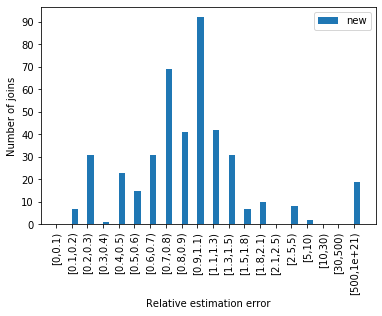

In [43]:
clustering.evaluation.print_aggregated_metrics(join_results, m.query_frequencies)
fig = clustering.evaluation.plot_join_errors(join_results, old_join_results, m.query_frequencies)
#old_join_results = join_results
fig

In [ ]:
joindbg = pd.read_csv(TPCH_SHIPDATE + "/joins.csv", sep='|')
joindbg.dropna(inplace=True)
joindbg['BUILD_COLUMN'] = joindbg.apply(lambda x: x[f"{x['BUILD_SIDE']}_COLUMN_NAME"], axis=1)
joindbg['PROBE_COLUMN'] = joindbg.apply(lambda x: x[f"{x['PROBE_SIDE']}_COLUMN_NAME"], axis=1)
viewcols = ['QUERY_HASH', 'IS_FLIPPED', 'PROBE_SORTED', 'BUILD_SORTED', 'PROBE_COLUMN', 'BUILD_COLUMN', 'DESCRIPTION']
joindbg[joindbg['QUERY_HASH'] == '3534234c34669919'][viewcols]

# SCAN EVALUATION

In [39]:
CLUSTERING_COLUMN = "l_shipdate"
scan_results = clustering.evaluation.evaluate_scans(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
print(f"There are {len(scan_results)} scans on {m.table_name}")

scan_results['e'] = scan_results['TOTAL_ERROR'] ** 2
scan_results['DESC'] = scan_results.apply(lambda x: " ".join(x['DESCRIPTION1'].split(" ")[3:]), axis=1)
scan_results.sort_values(['e'], ascending=False)[["QUERY_HASH", "DESC", "COLUMN_NAME", "RUNTIME_BASE", "RUNTIME_ESTIMATE", "RUNTIME_CLUSTERED", "TOTAL_ERROR", "RELATIVE_ERROR"]]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column INPUT_COLUMN_SORTED_Ascending
adding column SELECTIVITY_LEFT

There are 9 negative scan estimates. This is bad.
           QUERY_HASH  \
272  20e42e320de74706   
178  70918466ca2b12e7   
284  8e622f0e207e6f18   
202  aa61c7c63d209daf   
295  ce243643fa25f4     
153  e61e203cab97966a   
383  ed6641de1dfe8bc1   
160  f39f4116b27ebc04   
199  f6190012594cc036   

                                                 DESCRIPTION  \
272  TableScan Impl: ColumnVsValue l_shipdate > '1995-03-24'   
178  TableScan Impl: ColumnVsValue l_shipdate > '1995-03-14'   
284  TableScan Impl: ColumnVsValue l_shipdate > '1995-03-06'   
202  TableScan Impl: ColumnVsValue l_shipdate > '1995-03-27'   
295  TableScan Impl: ColumnVsValue l_shipdate > '1995-03-10'   
153  TableScan Impl: ColumnVsValue l_shipdate > '1995-0

,QUERY_HASH,DESC,COLUMN_NAME,RUNTIME_BASE,RUNTIME_ESTIMATE,RUNTIME_CLUSTERED,TOTAL_ERROR,RELATIVE_ERROR
67,6fb3f7e54d76ceed,l_shipdate <= '1998-09-27',l_shipdate,37477422,35207716,12810622,-22397094,0.363858
77,7a589f8ab18426d6,l_shipdate <= '1998-09-21',l_shipdate,37564660,35199069,12869083,-22329986,0.365609
9,3898d8ff5bfa1046,l_shipdate <= '1998-10-02',l_shipdate,43431425,35035568,13534294,-21501274,0.386302
121,d4f9e149097d68f9,l_shipdate <= '1998-08-18',l_shipdate,33494887,28097278,11018240,-17079038,0.392146
50,6081c4fbd55e16ea,l_shipdate <= '1998-09-08',l_shipdate,36079669,28097278,11093254,-17004024,0.394816
2,1a48bd3a39e20462,l_shipdate <= '1998-09-16',l_shipdate,34268638,28097278,11094232,-17003046,0.394851
45,5aa537e0d658225a,l_shipdate <= '1998-08-09',l_shipdate,38048341,28245749,12617288,-15628461,0.446697
141,f16984c46aa94970,l_shipdate <= '1998-09-01',l_shipdate,34217441,28097278,12575800,-15521478,0.447581
95,9a1adec8eeee6ec1,l_shipdate <= '1998-08-27',l_shipdate,41482588,28097278,12727785,-15369493,0.452990
29,4e4cb5b90ba5de03,l_shipdate <= '1998-08-04',l_shipdate,39097774,28245749,14485174,-13760575,0.512827


In [5]:
old_scan_results = None

There are 157 operators

35% of the operator estimates are over- or underestimated between factor 1 and 1.5
33% of the operator estimates are over- or underestimated between factor 1.5 and 3
25% of the operator estimates are over- or underestimated between factor 3 and 100
5% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 1,434 ms
Total estimate: 661 ms
Total measured: 338 ms
MSE: 22 ms^2
SMAPE: 74%


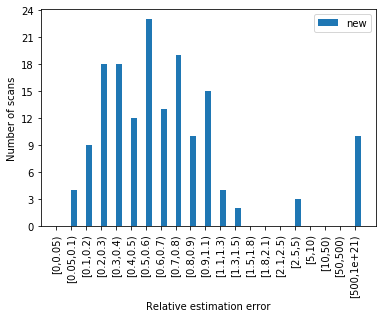

In [26]:
clustering.evaluation.print_aggregated_metrics(scan_results, m.query_frequencies)
fig = clustering.evaluation.plot_scan_errors(scan_results, old_scan_results, m.query_frequencies)
#old_scan_results = scan_results
fig

In [24]:

#scan_results['DESCRIPTION1'].apply(lambda x: "Like" in x).any()

,QUERY_HASH,DESC,COLUMN_NAME,RUNTIME_BASE,RUNTIME_ESTIMATE,RUNTIME_CLUSTERED,TOTAL_ERROR,RELATIVE_ERROR
67,6fb3f7e54d76ceed,l_shipdate <= '1998-09-27',l_shipdate,37477422,35207716,12810622,-22397094,0.363858
77,7a589f8ab18426d6,l_shipdate <= '1998-09-21',l_shipdate,37564660,35199069,12869083,-22329986,0.365609
9,3898d8ff5bfa1046,l_shipdate <= '1998-10-02',l_shipdate,43431425,35035568,13534294,-21501274,0.386302
121,d4f9e149097d68f9,l_shipdate <= '1998-08-18',l_shipdate,33494887,28097278,11018240,-17079038,0.392146
50,6081c4fbd55e16ea,l_shipdate <= '1998-09-08',l_shipdate,36079669,28097278,11093254,-17004024,0.394816
2,1a48bd3a39e20462,l_shipdate <= '1998-09-16',l_shipdate,34268638,28097278,11094232,-17003046,0.394851
45,5aa537e0d658225a,l_shipdate <= '1998-08-09',l_shipdate,38048341,28245749,12617288,-15628461,0.446697
141,f16984c46aa94970,l_shipdate <= '1998-09-01',l_shipdate,34217441,28097278,12575800,-15521478,0.447581
95,9a1adec8eeee6ec1,l_shipdate <= '1998-08-27',l_shipdate,41482588,28097278,12727785,-15369493,0.452990
29,4e4cb5b90ba5de03,l_shipdate <= '1998-08-04',l_shipdate,39097774,28245749,14485174,-13760575,0.512827


In [ ]:
scan_results[scan_results['RUNTIME_ESTIMATE'] == 1]

# AGGREGATE EVALUATION

In [29]:
CLUSTERING_COLUMN = "l_shipdate"
aggregate_results = clustering.evaluation.evaluate_aggregates(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
print(f"There are {len(aggregate_results)} aggregates")
aggregate_results['e'] = aggregate_results['TOTAL_ERROR'] ** 2
aggregate_results.sort_values(['e'], ascending=False)[['QUERY_HASH', 'DESCRIPTION1', 'RUNTIME_BASE_MS', 'RUNTIME_ESTIMATE_MS', 'RUNTIME_CLUSTERED_MS', 'TOTAL_ERROR_MS', 'RELATIVE_ERROR']]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column INPUT_COLUMN_SORTED_Ascending
adding column SELECTIVITY_LEFT

There are 235 aggregates


,QUERY_HASH,DESCRIPTION1,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,TOTAL_ERROR_MS,RELATIVE_ERROR
174,c64dec9688a08c55,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),616,"1,385",889,-496,0.641515
162,b9d744d428f1b8a1,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),622,"1,385",895,-490,0.646415
66,5689aad98171d7d2,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),621,"1,385",908,-477,0.655456
148,a795bcf5e93582f1,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),640,"1,385",917,-468,0.661965
108,7a589f8ab18426d6,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,465","1,298","1,458",159,1.123073
132,9a1adec8eeee6ec1,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,522","1,289","1,426",137,1.106399
97,6fb3f7e54d76ceed,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,523","1,301","1,434",132,1.101803
77,5aa537e0d658225a,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,575","1,281","1,413",132,1.103223
55,4e4cb5b90ba5de03,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,543","1,281","1,408",127,1.099311
82,6081c4fbd55e16ea,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,330","1,298","1,243",-55,0.957361


In [32]:
old_aggregate_results = None

There are 235 operators

28% of the operator estimates are over- or underestimated between factor 1 and 1.5
26% of the operator estimates are over- or underestimated between factor 1.5 and 3
44% of the operator estimates are over- or underestimated between factor 3 and 100
0% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 25,735 ms
Total estimate: 32,574 ms
Total measured: 27,564 ms
MSE: 9,434 ms^2
SMAPE: 91%


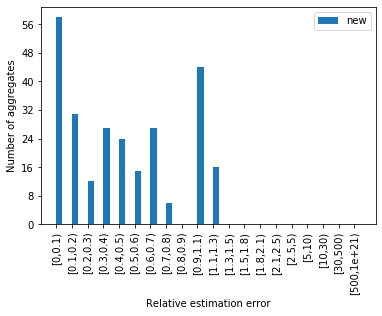

In [38]:
clustering.evaluation.print_aggregated_metrics(aggregate_results, m.query_frequencies)
fig = clustering.evaluation.plot_aggregate_errors(aggregate_results, old_aggregate_results, m.query_frequencies)
#old_aggregate_results = aggregate_results
fig